<h2>Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import scipy
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
%matplotlib inline

<h3>Getting the train and test datasets.
The dataset is splitted into train and test.</h3>

In [2]:
train=pd.read_csv(r"C:\Users\nagas\Downloads\bike-sharing-demand\train.csv", delimiter=',', encoding="utf-8-sig")
test=pd.read_csv(r"C:\Users\nagas\Downloads\bike-sharing-demand\test.csv", delimiter=',', encoding="utf-8-sig")

<h3>Train dataset Information</h3>

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<h3>Statistics of the Data</h3>

In [4]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
print(train.columns.tolist())

['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


<h4>
Categorical features of the dataset.<br>
Season<br>
Holiday<br>
Working day
Weather<br>

Numerical features of the dataset<br>
temp- Temperature<br>
atemp - Absolute temperature<br>
humidity - Humidity<br>
Wind speed - Wind speeed<br>
casual users<br>
registered users<br>
count = casual + registered = total</h4>

In [8]:
train['datetime']=pd.to_datetime(train['datetime'])
test['datetime']=pd.to_datetime(test['datetime'])

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
def split_datetime(df):
    df['year']=df["datetime"].apply(lambda i:i.year)
    df['month']=df["datetime"].apply(lambda i:i.month)
    df['day']=df["datetime"].apply(lambda i:i.day)
    df['dayofweek']=df["datetime"].apply(lambda i:i.dayofweek)
    df['hour']=df["datetime"].apply(lambda i:i.hour)
    df=df.drop(["datetime"],axis=1)
    return df

In [12]:
train=split_datetime(train)
test=split_datetime(test)

In [13]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [14]:
print(train.columns.tolist())

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'day', 'dayofweek', 'hour']


In [15]:
train=train.drop(['casual'], axis=1)

In [16]:
train=train.drop(['registered'], axis=1)

In [17]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


<h3>Using the below chart we can observe that there is skewness in the dataset.</h3>

C:\Users\nagas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

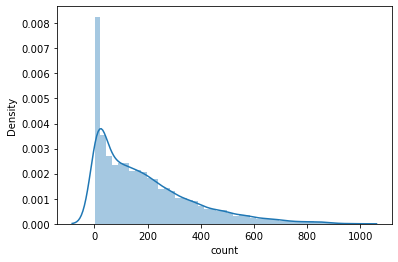

In [18]:
sns.distplot(train['count'])

<h3>From the below chart we can see that there are some outliers in the dataset.</h3>

<AxesSubplot:xlabel='count'>

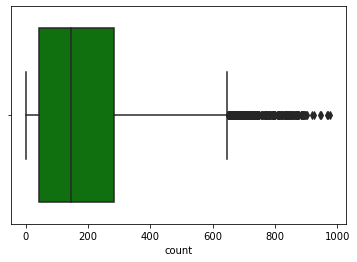

In [19]:
sns.boxplot(x='count',data=train,color='green')

<h4>Therefore a log function is used for removing the skewness</h4>

<h4>For removing the outliers min max scaler is used so as to preprocess the dataset.</h4>

In [20]:
train['count']=np.log1p(train['count'])

C:\Users\nagas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

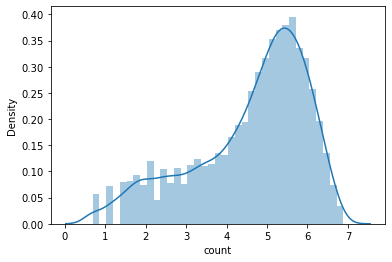

In [21]:
sns.distplot(train['count'])

<h4>The results after removing the skewness of the datset.</h4>

In [22]:
train=train[np.abs(train['count'])-train['count'].mean() <= (3*train['count'].std())]

<AxesSubplot:xlabel='count'>

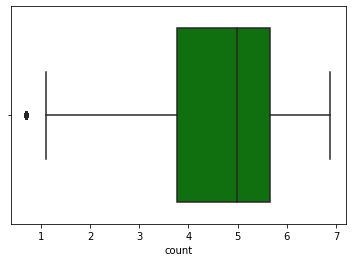

In [23]:
sns.boxplot(x='count',data=train,color='green')

<h4>Dataset after removing the outliers in the dataset.</h4>

In [24]:
index_dropped=train[(train['atemp']>20S) & (train['atemp']<40) & (train['temp']>10) & (train['temp']<20)].index

<h4>Temperatures and Absolute temperatures which are above 10 and below 40 are dropped as they might affect the model building.</h4>

In [25]:
train=train.drop(index_dropped)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
def scaleData(dataFrame):
    scaler=MinMaxScaler()
    num_cols=['temp','atemp','humidity','windspeed']
    dataFrame[num_cols]=scaler.fit_transform(dataFrame[num_cols])
    return dataFrame

In [28]:
train=scaleData(train)
test=scaleData(test)

In [29]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,0.224490,0.305068,0.81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,0.204082,0.288064,0.80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,0.204082,0.288064,0.80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,0.224490,0.305068,0.75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,0.224490,0.305068,0.75,0.0,0.693147,2011,1,1,5,4


In [30]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,0.25,0.2273,0.47619,0.464346,2011,1,20,3,0
1,1,0,1,1,0.25,0.2727,0.47619,0.000000,2011,1,20,3,1
2,1,0,1,1,0.25,0.2727,0.47619,0.000000,2011,1,20,3,2
3,1,0,1,1,0.25,0.2576,0.47619,0.196458,2011,1,20,3,3
4,1,0,1,1,0.25,0.2576,0.47619,0.196458,2011,1,20,3,4


<h4>Dropping the target variable from the dataset and splitting the dataset to train the model.</h4>

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train.drop(['count'],axis=1),train['count'],test_size=0.3, random_state=42)

In [76]:
train.shape

(9226, 14)

In [77]:
test.shape

(6493, 13)

<h5>
To evaluate the model and to view the error we use the following function. 
It is calculated by squaring the difference between the actual value and the predicted value. 
</h5>

In [78]:
def ModelError(y,predictor):
    log_y=np.log1p(y)
    log_pred=np.log1p(predictor)
    error_double=(log_y-log_pred)**2
    error=np.sqrt(np.mean(error_double))
    return error

<h2>Importing all the required models.

In [79]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import GridSearchCV

<h4>To evaluate the model here we use the root mean square error method.
The lesser the error better the model. We apply this method on all the regression models to evaluate 
the performance of each model.</h4>

In [128]:

def evaluationModels(reg_u,params=None):
    reg=reg_u()
    if params:
        reg=GridSearchCV(reg,param_grid=params,refit=True)
    reg.fit(x_train,y_train)
    pred=reg.predict(x_test)
    
    y_test_exp=np.expm1(y_test)
    pred_exp=np.expm1(pred)
    print('\n',reg_u)
    if params:
        print(reg.best_params_)
        reg=reg.best_estimator_
    print(ModelError(y_test_exp,pred_exp))
    return reg,pred_exp

<h3>
Linear Regression<br><br>
Random Forest Regressor<br><br>
Gradient Boosting Regressor<br><br>
XGBRegressor<br><br>
Ridge<br><br>
Lasso<br><br>
LGBM Regressor<br><br>
</h3>
<b>A short Description about the Models:</b><br>
<b>Linear Regression</b> : The linear connection between a dependent variable and one or more independent variables is modeled using the machine learning method linear regression. It may be used for prediction or inference and determines the coefficients that best match a straight line across the data points. The procedure makes the assumption that there is no multicollinearity or heteroscedasticity in the data, and that the relationships between the variables are linear. It is an easy-to-use and popular regression analysis technique.​

<b>Random Forest Regressor:</b> Regression challenges are carried out using the machine learning method which is  RandomForestRegressor. By training each tree on a random subset of the data and the features, it builds an ensemble of decision trees. The algorithm then aggregates all of the tree predictions to create a single final forecast. The RandomForestRegressor is renowned for its excellent accuracy, resistance to overfitting, and capacity for handling large, complicated datasets.​

<b>Gradient Boosting Regressor:</b> The GradientBoostingRegressor reduces the inaccuracy of the model predictions by repeatedly training weak decision trees using the residuals of the prior tree. To create a final forecast, the algorithm integrates the predictions from many trees and modifies the weights of the samples that were incorrectly categorized. ​

<b>XGBRegressor:</b> An ensemble of decision trees is used by the machine learning method XGBRegressor to perform regression tasks. It stands for Extreme Gradient Boosting Regressor and refers to a gradient boosting variation that places an emphasis on quick computation and little memory consumption. In order to provide a final forecast XGBRegressor constructs a number of decision trees each of which makes an effort to fix the flaws of the one before it.​

<b>Ridge:</b> In order to avoid overfitting, ridge regression, a kind of linear regression, employs L2 regularization. The regression equation is given a penalty term that causes the coefficients to go toward zero, strengthening the model's stability and decreasing its sensitivity to minute changes in the input data. This helps to lessen the effects of multicollinearity and can enhance the model's capacity for prediction. A hyperparameter that regulates the severity of the punishment may be adjusted using cross-validation methods.

In [129]:
lr_reg,pred_lr=evaluationModels(LinearRegression)
rfrg_reg,pred_rfrg=evaluationModels(RandomForestRegressor)
gbr_reg,pred_gbr=evaluationModels(GradientBoostingRegressor)
xgbr_reg,pred_xgbr=evaluationModels(XGBRegressor)
rdg_reg,pred_rdg=evaluationModels(Ridge)
las_reg,pred_las=evaluationModels(Lasso)
lgbm_reg,pred_lgbm=evaluationModels(LGBMRegressor)

params={'n_estimators':[100,200,300,400,500,600]}
xgbr_reg,pred_xgbr=evaluationModels(XGBRegressor,params)
lgbm_reg,pred_lgbm=evaluationModels(LGBMRegressor,params)



 <class 'sklearn.linear_model._base.LinearRegression'>
1.0094540422576332

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.3124603675573119

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
0.4001748205957323

 <class 'xgboost.sklearn.XGBRegressor'>
0.29955312688380004

 <class 'sklearn.linear_model._ridge.Ridge'>
1.0094387798079902

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
1.1908872032455555

 <class 'lightgbm.sklearn.LGBMRegressor'>
0.2888236640005744

 <class 'xgboost.sklearn.XGBRegressor'>
{'n_estimators': 100}
0.29955312688380004

 <class 'lightgbm.sklearn.LGBMRegressor'>
{'n_estimators': 300}
0.27698258834195694


 
<b>Models Evaluated        and their    Root Mean Square Error value</b>

Linear Regression<br>           1.015<br>

Random Forest Regression<br>    0.314<br>

Gradient Boosting Regressor<br> 0.388<br>

XGB Regressor<br>               0.305<br>

Ridge          <br>             1.014<br>

Lasso             <br>          1.188<br>

<h4>From the above mean square errors we see that LGBM regressor is giving the least error.</h4>

In [82]:
def importantFeatures(reg):
    plt.figure(figsize=(20,20))
    print(type(reg))
    df=pd.DataFrame(sorted(zip(x_train.columns,reg.feature_importances_)),columns=['features','values'])
    sns.barplot(x='values',y='features',data=df.sort_values(by='values',ascending=False))
    plt.show()

<h3>Here we print all feature importance given by each regressr to each feature.</h3>

<class 'lightgbm.sklearn.LGBMRegressor'>


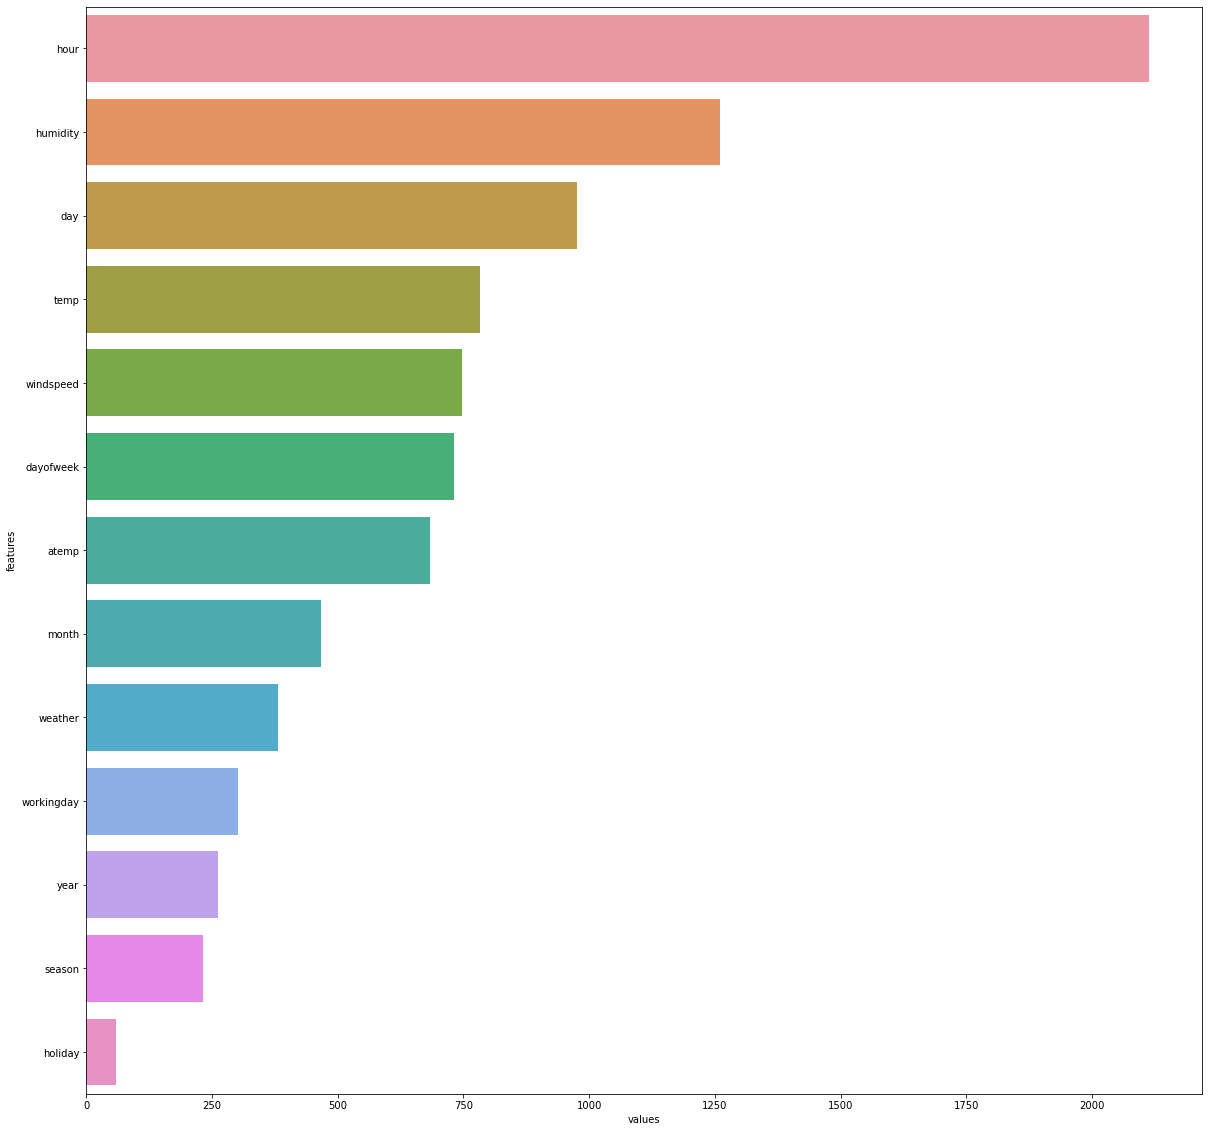

In [83]:
importantFeatures(lgbm_reg)

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


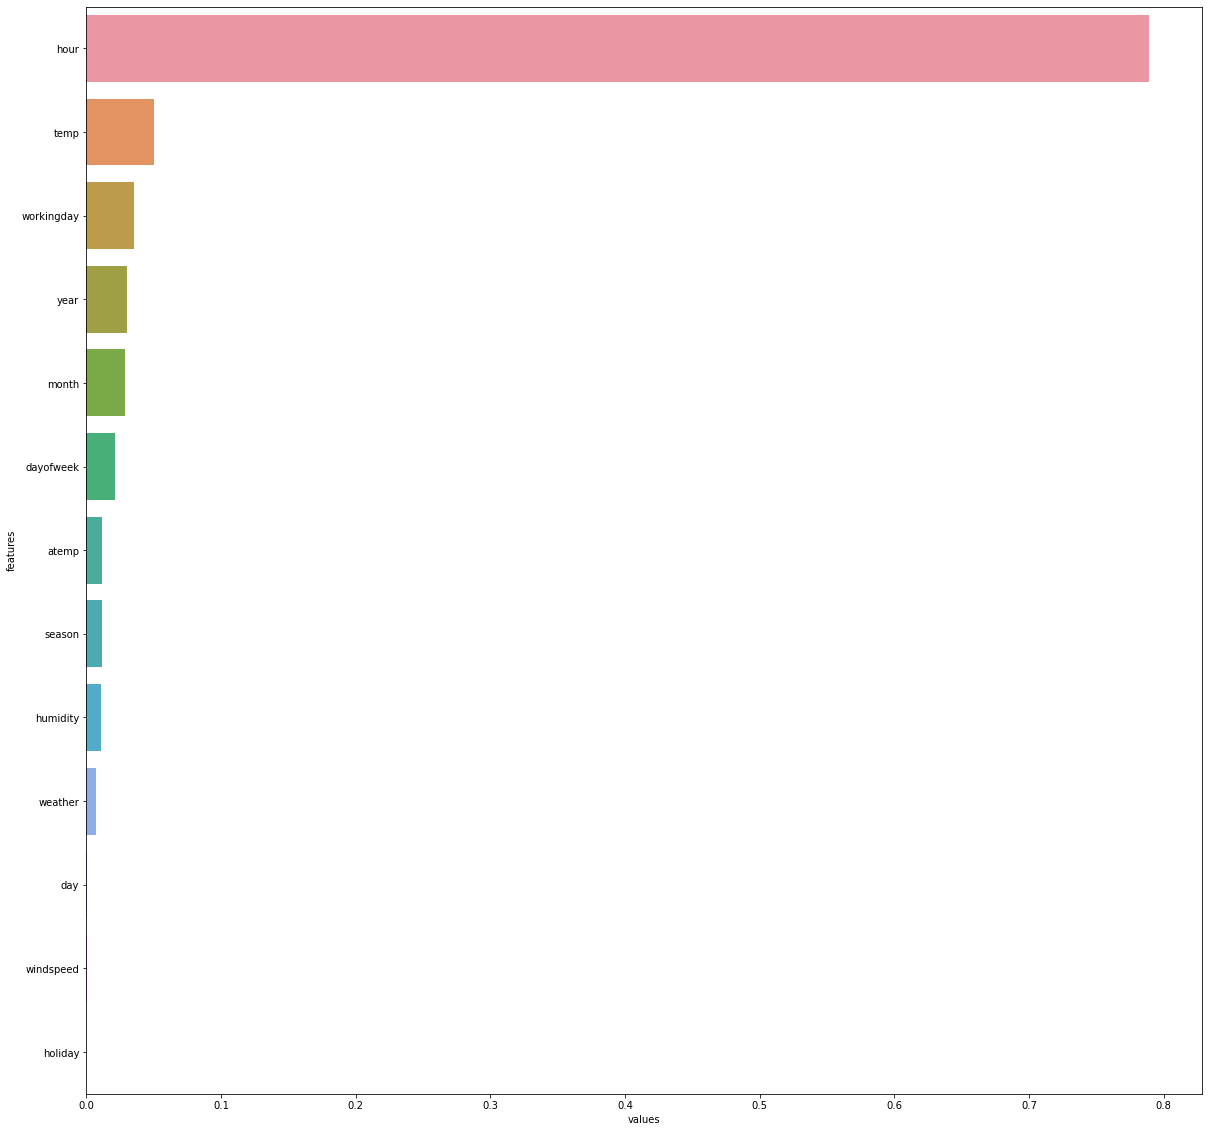

In [84]:
importantFeatures(gbr_reg)

<class 'xgboost.sklearn.XGBRegressor'>


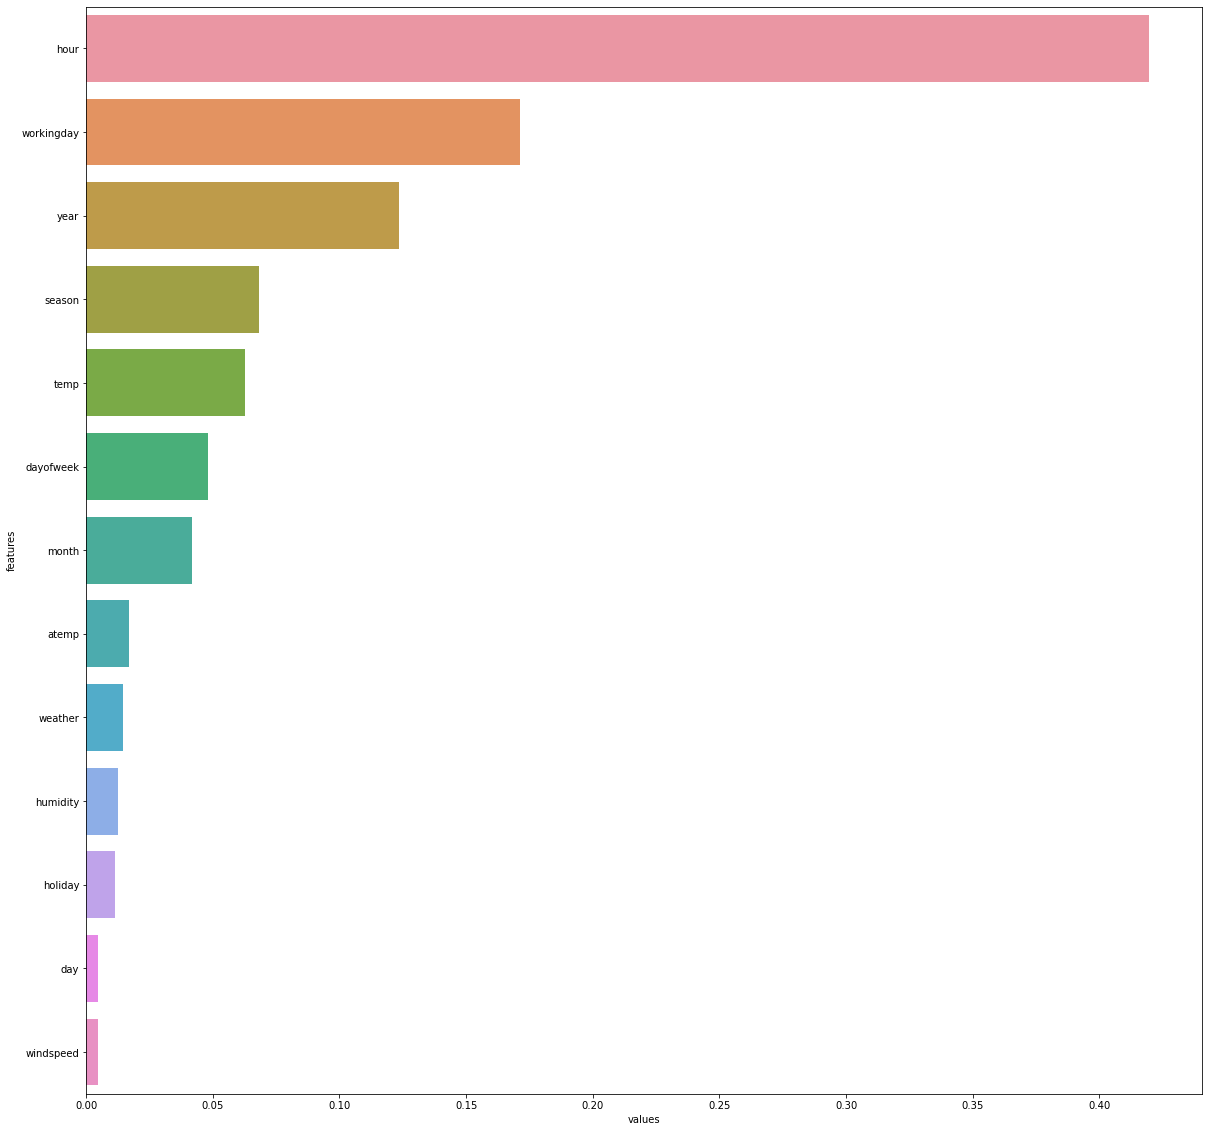

In [85]:
importantFeatures(xgbr_reg)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


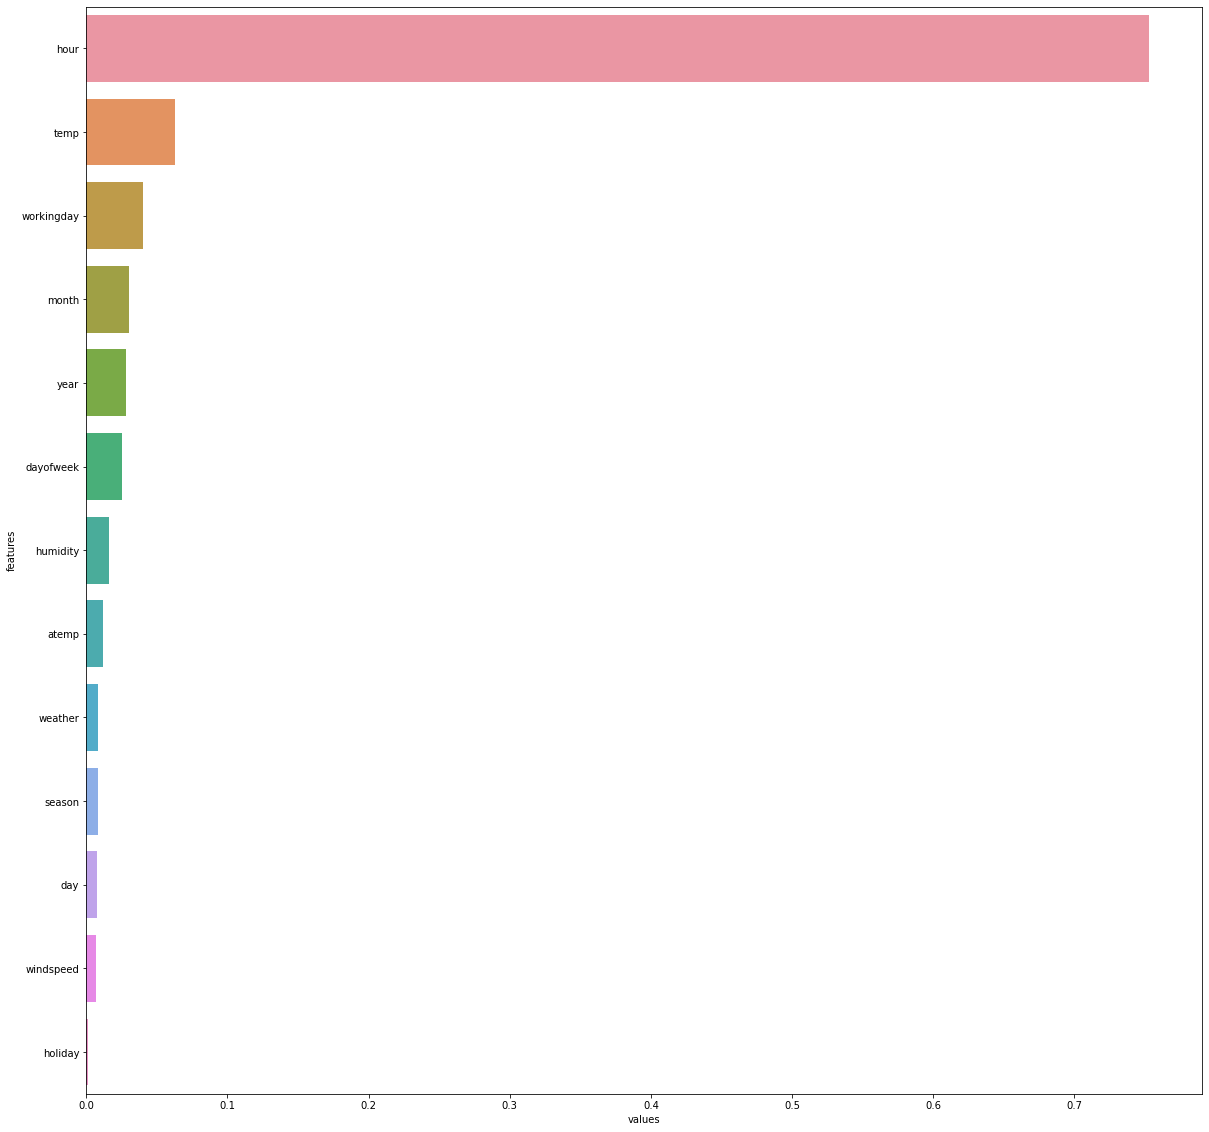

In [86]:
importantFeatures(rfrg_reg)

In [87]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,0.224490,0.305068,0.81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,0.204082,0.288064,0.80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,0.204082,0.288064,0.80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,0.224490,0.305068,0.75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,0.224490,0.305068,0.75,0.0,0.693147,2011,1,1,5,4


In [88]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,0.25,0.2273,0.47619,0.464346,2011,1,20,3,0
1,1,0,1,1,0.25,0.2727,0.47619,0.000000,2011,1,20,3,1
2,1,0,1,1,0.25,0.2727,0.47619,0.000000,2011,1,20,3,2
3,1,0,1,1,0.25,0.2576,0.47619,0.196458,2011,1,20,3,3
4,1,0,1,1,0.25,0.2576,0.47619,0.196458,2011,1,20,3,4


<h3>
Here we print all the predicted values of the test dataset.
We can see that only LGBR and GBR regrssor are giving the closest results.
</h3>

Evaluation of the model

In [89]:
pred=lgbm_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

[  9.52921396   6.33892832   4.32708298 ... 135.64118439  97.77542301
  53.61827089]


In [90]:
pred=gbr_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

[  8.35669148   4.71286778   2.59091215 ... 142.87970637 122.33856416
  71.44592386]


In [91]:
pred=lr_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

[ 14.59705922  14.42525385  16.00388053 ... 357.22572045 427.72193265
 403.319219  ]


In [92]:
pred=las_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

[ 31.83277018  35.15755137  38.81901355 ... 247.90218736 273.10704533
 300.86425076]


In [93]:
pred=rfrg_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

[ 12.76895581   6.15098969   3.79585887 ... 128.35810204 110.74500074
  63.89529212]


In [94]:
pred=gbr_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

[  8.35669148   4.71286778   2.59091215 ... 142.87970637 122.33856416
  71.44592386]


In [95]:
pred=rdg_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

[ 14.69820557  14.47233801  16.05756048 ... 359.46376539 429.05855929
 405.08024102]


After viewing all the models and their root mean square errors, the model that performs best is XGB Regressor.

If the root mean squared error lies in between 0.25 and 0.5 then we can conclude that the model predicts the data accurately.

The root mean squared error is greater than 0.5 then we can conclude that the model is not effective as it will have less accuracy while predicting the results.​

From the above slides the models that are having 0.317, 0.388, 0.305 as root mean square errors shows that these models predicts most of the values correctly.​

The root mean square errors showing the values 1.015 and 1.188 indicates that their model accuracy is very low when compared with the models showing higher accuracy.​